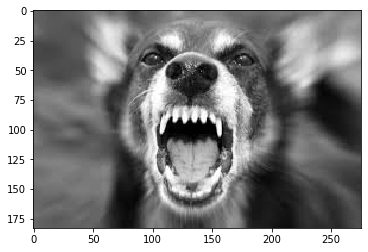

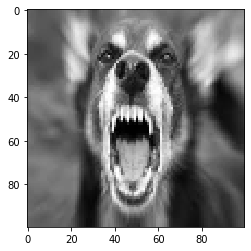

1906
1
1
1
0
0
1
0
0
0
1
0
1
1
1
1
0
0
0
0
1


In [1]:
import cv2
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DATADIR = "images/model1" #GIVE YOUR OWN PATH
CATEGORIES = ["Angry","Sleeping"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #joins our path to cat and dog directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array , cmap="gray")
        plt.show()
        break
    break


IMG_SIZE = 100
new_array= cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
plt.imshow(new_array , cmap='gray')
plt.show()

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #joins our path to cat and dog directory
        class_num= CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array= cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


print(len(training_data))

import random

random.shuffle(training_data)

for sample in training_data[:20]:
    print(sample[1])


M = []
n = []
for features , label in training_data:
    M.append(features)
    n.append(label)
    
M = np.array(M).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


import pickle


pickle_out=open("M.pickle","wb")
pickle.dump(M, pickle_out)
pickle_out.close()

pickle_out=open("n.pickle","wb")
pickle.dump(n, pickle_out)
pickle_out.close()
pickle_in = open("M.pickle","rb")
M = pickle.load(pickle_in)


In [2]:
#TRAINING THE DATA
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import pickle

M= pickle.load(open("M.pickle","rb"))
n= pickle.load(open("n.pickle","rb"))

M=M/255.0

model = Sequential()
model.add(Conv2D(64 ,(3,3) , input_shape=M.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64 ,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(M,n,batch_size=2 ,epochs=32, validation_split=0.1)

model.save('angryandsleeping')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1715 samples, validate on 191 samples
Epoch 1/32
1715/1715 [==============================] - 54s 31ms/sample - loss: 0.5665 - acc: 0.7329 - val_loss: 0.3302 - val_acc: 0.8848
Epoch 2/32
1715/1715 [==============================] - 53s 31ms/sample - loss: 0.2102 - acc: 0.9230 - val_loss: 0.1320 - val_acc: 0.9634
Epoch 3/32
1715/1715 [==============================] - 53s 31ms/sample - loss: 0.0498 - acc: 0.9860 - val_loss: 0.1276 - val_acc: 0.9476
Epoch 4/32
1715/1715 [==============================] - 53s 31ms/sample - loss: 0.0353 - acc: 0.9907 - val_loss: 0.1853 - val_acc: 0.9686
Epoch 5/32
1715/1715 [==============================] - 53s 31ms/sample - loss: 0.0088 - acc: 0.9983 - val_loss: 0.2468 - val_acc: 0.9843
Epoch 6/32
1715/1715 [==============================] - 53s 31ms/sample - loss: 0.0648 -